In [1]:
import os
import sys
import time
import math
import numpy
import warnings
import struct
import binascii
import pandas as pd
import numpy as np
import pickle
import h5py
import tensorflow as tf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

In [2]:
from datetime import datetime
from sklearn import preprocessing
from tqdm import tqdm,tqdm_notebook
from IPython.display import display, clear_output
from matplotlib.image import imread # read images
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
from numpy.polynomial.polynomial import polyfit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation,concatenate
from tensorflow.keras.optimizers import Adam #optimizer
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.python.client import device_lib
from sklearn.preprocessing import MinMaxScaler # normalize and scale data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [33]:
#Checking out all of the relevant information in this h5 file
f=h5py.File('/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_Files_FHC_mominkhan/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00010582_s17_c005_R19-11-18-prod5reco.x_v1_20191024_022032_sim.h5caf.h5')
#f=h5py.File('/home/c479r989/research_repo/data-preprocess/ND_MC_Nominal_FHC_testdata/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00010582_s17_c005_R19-11-18-prod5reco.x_v1_20191024_022032_sim_TrainData.h5caf.h5')


f.keys()    
#list(f.keys()) 
#print(f)

#list(f['PDG'])

/opt/software/software/IPython/7.9.0-foss-2019b-Python-3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


<KeysViewHDF5 ['MetaData', 'neutrino', 'neutrino.beam', 'neutrino.genVersion', 'neutrino.michel', 'neutrino.prim', 'neutrino.prim.daughterEnergies', 'neutrino.prim.daughterlist', 'neutrino.rwgt.genie', 'neutrino.rwgt.ppfx', 'neutrino.rwgt.ppfx.vuniv', 'rec.energy.nue', 'rec.energy.nue.lid', 'rec.energy.numu', 'rec.energy.numu.bpfenergy', 'rec.energy.numu.hadclust', 'rec.energy.numu.mc', 'rec.hdr', 'rec.mc', 'rec.mc.allcosmics', 'rec.mc.allcosmics.michel', 'rec.mc.allnus', 'rec.mc.allnus.beam', 'rec.mc.allnus.genVersion', 'rec.mc.allnus.michel', 'rec.mc.allnus.prim', 'rec.mc.allnus.prim.daughterEnergies', 'rec.mc.allnus.prim.daughterlist', 'rec.mc.allnus.rwgt.genie', 'rec.mc.allnus.rwgt.ppfx', 'rec.mc.allnus.rwgt.ppfx.vuniv', 'rec.mc.cosmic', 'rec.mc.cosmic.michel', 'rec.mc.global', 'rec.mc.nu', 'rec.mc.nu.beam', 'rec.mc.nu.genVersion', 'rec.mc.nu.michel', 'rec.mc.nu.prim', 'rec.mc.nu.prim.daughterEnergies', 'rec.mc.nu.prim.daughterlist', 'rec.mc.nu.rwgt.genie', 'rec.mc.nu.rwgt.ppfx', '

In [34]:
list(f['rec.training.cvnmaps'])

['cvnlabmap',
 'cvnmap',
 'cvnobjmap',
 'cycle',
 'evt',
 'firstcellx',
 'firstcelly',
 'firstplane',
 'hitfracx',
 'hitfracy',
 'lastcellx',
 'lastcelly',
 'lastplane',
 'ncells',
 'nchan',
 'nplanes',
 'rec.training.cvnmaps_idx',
 'run',
 'subevt',
 'subrun']

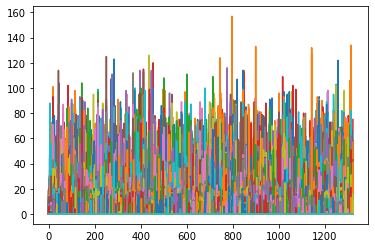

In [51]:
c=f['rec.training.cvnmaps']['cvnmap'][:]
plt.plot(c)
plt.show()

In [4]:
list(f['rec.vtx.elastic.fuzzyk.png.prongtrainingdata'])

['cycle',
 'evt',
 'isprimary',
 'label3d',
 'labelx',
 'labely',
 'ncellx',
 'ncelly',
 'pangle',
 'pgap',
 'plength',
 'purity3d',
 'purityx',
 'purityy',
 'rec.vtx.elastic.fuzzyk.png.prongtrainingdata_idx',
 'rec.vtx.elastic.fuzzyk.png_idx',
 'rece',
 'run',
 'subevt',
 'subrun',
 'vertx',
 'verty',
 'vertz']

In [8]:
g=f['rec.vtx.elastic.fuzzyk.png.prongtrainingdata']['rec.vtx.elastic.fuzzyk.png.prongtrainingdata_idx'][:]
h=f['rec.vtx.elastic.fuzzyk.png.prongtrainingdata']['rec.vtx.elastic.fuzzyk.png_idx'][:]
#s=f['rec.vtx.elastic.fuzzyk.png.prongtrainingdata']['rec.vtx.hough'][:]


[[ 154.28538772]
 [ 154.28538772]
 [1548.25760244]
 ...
 [1040.47894085]
 [1040.47894085]
 [1040.47894085]]


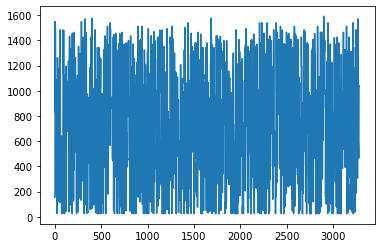

In [65]:
#plt.plot(g)
import numpy as np
plt.plot(s)
print(s)


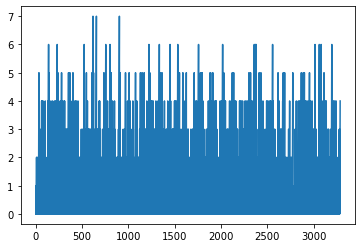

In [25]:
plt.plot(h)

In [29]:
#sns.kdeplot(data=h,x='True X',y='Model Predictions',fill=True)
# plot aesthetics
cmap_reversed = plt.cm.get_cmap('gist_heat_r')
plt.rcParams["font.family"] = "Times New Roman"
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]
#[f.name for f in matplotlib.font_manager.fontManager.afmlist]

['STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Sans Mono',
 'cmtt10',
 'cmb10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'cmr10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'cmex10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'cmmi10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmsy10',
 'STIXSizeFiveSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'Caladea',
 'STIX MathJax Variants',
 'Lohit Marathi',
 'WenQuanYi Zen Hei',
 'STIX MathJax Main',
 'Open Sans',
 'STIX MathJax Misc',
 'Nimbus Sans Narrow',
 'MathJax_Caligraphic',
 'Overpass',
 'DejaVu Serif',
 'FreeMono',
 'Liberation Mono',
 'Lohit Punjabi',
 'Carlito',
 'STIX MathJax Normal',
 'URW Bookman',
 'MathJax_Size3',
 'Libera

In [30]:
def plot_event_with_vtx(event1,event2,idx=0):
    pixelmap1=event1[idx]
    pixelmap2=event2[idx]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))
    # added [:-20] to end of pixelmap[X] to preview square images for CNN
    sns.heatmap(pixelmap1[:-20],cmap=cmap_reversed,cbar=False,square=True,xticklabels=10,yticklabels=10,ax=axes[0])
    sns.heatmap(pixelmap2[:-20],cmap=cmap_reversed,cbar=False,square=True,xticklabels=10,yticklabels=10,ax=axes[1])
#    plt.imshow(pixelmap[1][:-20], cmap=cmap_reversed, interpolation='nearest')
#    axes[0].scatter(x=vtxx,y=vtxz,c='yellow',marker='x',s=50)
#    axes[1].scatter(x=vtxy,y=vtxz,c='yellow',marker='x',s=50)
#    plt.suptitle("XZ & YZ Plot", fontsize=30)
#    print('UX Specified Fields\nEvent Number:\t{}'.format(idx))
#    print('CVN Vertex Position (x,y,z) = ({},{},{})'.format(f'{vtxx:.3}',f'{vtxy:.3}',f'{vtxz:.3}'))
    axes[0].set_xlabel("Cell",fontdict=font)
    axes[0].set_ylabel("Plane", fontdict=font)
    axes[0].set_title('XZ-View',fontdict=font)
    axes[0].set_xlim(10,70)
    axes[0].set_ylim(40,0)
    axes[1].set_xlabel("Cell",fontdict=font)
    axes[1].set_ylabel("Plane",fontdict=font)
    axes[1].set_title('YZ-View',fontdict=font)
    axes[1].set_xlim(10,70)
    axes[1].set_ylim(40,0)
    sns.despine(bottom = False, top=False, right=False, left = False)
    plt.savefig('cvnpixelmapqe.pdf')
    plt.tight_layout()
    plt.show()

In [36]:
plot_event_with_vtx(h,idx=3284)

TypeError: plot_event_with_vtx() missing 1 required positional argument: 'event2'

In [50]:
list(f['rec.vtx.hough.fuzzyk.png.prongtrainingdata'])
#list(f['rec.vtx.hough.fuzzyk.png2d.prongtrainingdata'])

['cycle',
 'evt',
 'isprimary',
 'label3d',
 'labelx',
 'labely',
 'ncellx',
 'ncelly',
 'pangle',
 'pgap',
 'plength',
 'purity3d',
 'purityx',
 'purityy',
 'rec.vtx.hough.fuzzyk.png.prongtrainingdata_idx',
 'rec.vtx.hough.fuzzyk.png_idx',
 'rec.vtx.hough_idx',
 'rece',
 'run',
 'subevt',
 'subrun',
 'vertx',
 'verty',
 'vertz']

In [55]:
test=f['rec.vtx.hough.fuzzyk.png.prongtrainingdata']['rec.vtx.hough.fuzzyk.png.prongtrainingdata_idx'][:]
testtwo=f['rec.vtx.hough.fuzzyk.png.prongtrainingdata']['rec.vtx.hough.fuzzyk.png_idx'][:]

In [61]:
print(testtwo)

[]


In [9]:
list(f['rec.vtx.hough'])

['cycle',
 'evt',
 'rec.vtx.hough_idx',
 'run',
 'subevt',
 'subrun',
 'time',
 'vtx.x',
 'vtx.y',
 'vtx.z']

In [14]:
test=f['rec.vtx.hough']['rec.vtx.hough_idx'][:]

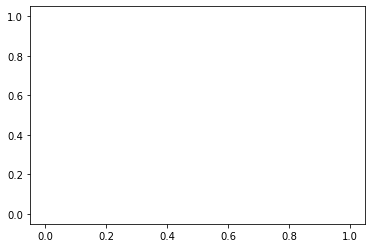

In [16]:
plt.plot(test)